# music audio tagging example

### musicnn allows predicting music tags with just two lines of code

-------

In the following, you will learn how to use `musicnn` to automatically tag your music.
To start, let's consider this music clip:

In [ ]:
file_name = './audio/example4.mp3'

Run these two code lines to predict the `top3` most likely tags according to our `MTT model`:

In [14]:
from musicnn.tagger import top_tags
tags = top_tags(file_name, model='MTT_musicnn', topN=3)

Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. done!
[./audio/example4.mp3] Top3 tags: 
 - male
 - male vocal
 - man


-----------------------------
### Are you interested in the temporal evolution of these tags? 

Instead of predicting song-level tags, you can also plot the **Taggram**:

In [15]:
from musicnn.extractor import extractor
taggram, tags = extractor(file_name, model='MTT_musicnn', extract_features=False)

Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. done!


In [16]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [17]:
in_length = 3 # seconds  by default, the model takes inputs of 3 seconds with no overlap

plt.rcParams["figure.figsize"] = (10,8) # set size of the figures
fontsize = 12 # set figures font size

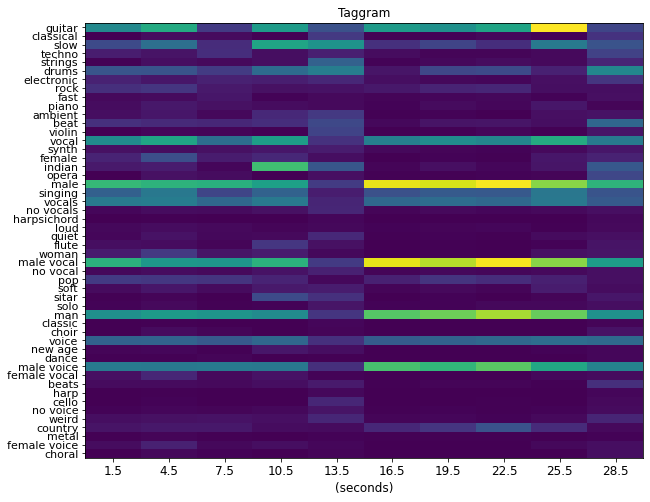

In [18]:
fig, ax = plt.subplots()

# title
ax.title.set_text('Taggram')
ax.title.set_fontsize(fontsize)

# x-axis title
ax.set_xlabel('(seconds)', fontsize=fontsize)

# y-axis
y_pos = np.arange(len(tags))
ax.set_yticks(y_pos)
ax.set_yticklabels(tags, fontsize=fontsize-1)

# x-axis
x_pos = np.arange(taggram.shape[0])
x_label = np.arange(in_length/2, in_length*taggram.shape[0], 3)
ax.set_xticks(x_pos)
ax.set_xticklabels(x_label, fontsize=fontsize)

# depict taggram
ax.imshow(taggram.T, interpolation=None, aspect="auto")
plt.show()

----------------------------------
### How did we compute the top3 tags?

Note that the Taggram can be interpreted as the temporal evolution of the tags likelihood.

From the Taggram, we can compute the **song-level tags likelihood** by simply averaging through time:

In [8]:
tags_likelihood_mean = np.mean(taggram, axis=0) # averaging the Taggram through time 

This song-level tags likelihood has the following shape:

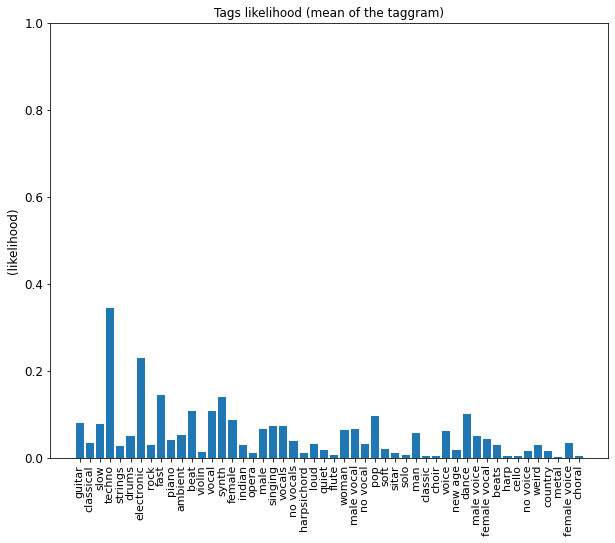

In [9]:
fig, ax = plt.subplots()

# title
ax.title.set_text('Tags likelihood (mean of the taggram)')
ax.title.set_fontsize(fontsize)

# y-axis title
ax.set_ylabel('(likelihood)', fontsize=fontsize)

# y-axis
ax.set_ylim((0, 1))
ax.tick_params(axis="y", labelsize=fontsize)

# x-axis
ax.tick_params(axis="x", labelsize=fontsize-1)
pos = np.arange(len(tags))
ax.set_xticks(pos)
ax.set_xticklabels(tags, rotation=90)

# depict song-level tags likelihood
ax.bar(pos, tags_likelihood_mean)
plt.show()

From the above tags likelihood, the `top_tag()` function computes the **top3** tags.